In [1]:
from scipy import stats

In [2]:
import pandas as pd
import numpy as np
import torch as pt
import multiprocessing
#from bps import bps
from sembps.bps import bps
from torch.utils.data import Dataset, DataLoader
import os
from tqdm import tqdm
import h5py

In [3]:
data_path = os.path.join(os.sep, 'media', 'add320', 'riccardo', 'data')
train_path = os.path.join(data_path, 'train')
hdf5_path = os.path.join(data_path, 'hdf5')
no_unlabeled_h5_path = os.path.join(data_path, 'no_unlabeled_hdf5')
hdf5_train_path = os.path.join(hdf5_path, 'train')
encoded_hdf5_path = os.path.join(data_path, 'tree_encoded_hdf5')
p = os.path.join(os.sep, 'media', 'add320', 'riccardo')
logs_path = os.path.join(p, 'logs')

# All the clouds in the training dataset
train_files = [
    "bildstein_station1_xyz_intensity_rgb",
    "bildstein_station3_xyz_intensity_rgb",
    "bildstein_station5_xyz_intensity_rgb",
    "domfountain_station1_xyz_intensity_rgb",
    "domfountain_station2_xyz_intensity_rgb",
    "domfountain_station3_xyz_intensity_rgb",
    "neugasse_station1_xyz_intensity_rgb",
    "sg27_station1_intensity_rgb",
    "sg27_station2_intensity_rgb",
    "sg27_station4_intensity_rgb",
    "sg27_station5_intensity_rgb",
    "sg27_station9_intensity_rgb",
    "sg28_station4_intensity_rgb",
    "untermaederbrunnen_station1_xyz_intensity_rgb",
    "untermaederbrunnen_station3_xyz_intensity_rgb",
]

In [4]:
modelnet40_path = os.path.join(data_path, 'modelnet40', 'models')

In [120]:
n_orig_points = 2048
n_bps_points = 512
n_dims = 3
radius = 0.5
random_seed = 13

In [121]:
# batch of 100 point clouds to convert
x = np.random.normal(size=[100, n_orig_points, 3])

# optional point cloud normalization to fit a unit sphere
x = bps.normalize(x)

In [122]:
from timeit import default_timer as timer
import time
from sklearn.neighbors import NearestNeighbors

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [123]:
n_clouds, n_points, n_dims = x.shape

basis_set = bps.generate_random_basis(n_bps_points, n_dims=n_dims, radius=radius, random_seed=random_seed)

n_bps_points = basis_set.shape[0]

x_bps = np.zeros([n_clouds, n_bps_points])
        
fid_lst = range(0, x.shape[0])

idx_bps = np.zeros([n_clouds, n_bps_points])

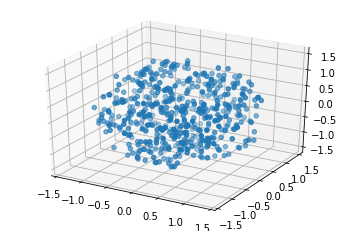

In [14]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = basis_set.T
ax.scatter(x,y,z)
plt.show()

# kde

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

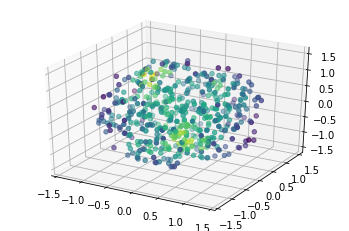

In [15]:
#mu=np.array([1,10,20])
#sigma=np.matrix([[4,10,0],[10,25,0],[0,0,100]])
#data=np.random.multivariate_normal(mu,sigma,1000)
#values = data.T

values = basis_set.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

In [25]:
kde(values).shape

(512,)

In [17]:
BPS_POINTS = 512

mod40file = os.path.join(modelnet40_path, 'ply_data_test0.h5')

with h5py.File(mod40file, 'r') as f_to_r:
        cloud = f_to_r['data'][10] # get first cloud

In [18]:
cloud

array([[-0.35582095,  0.24284531,  0.28523776],
       [ 0.3499767 , -0.25797933, -0.06835257],
       [-0.5281753 , -0.24272192, -0.80760765],
       ...,
       [-0.53478944, -0.25797933,  0.23740014],
       [ 0.3357639 , -0.25797933, -0.20709583],
       [ 0.54144007, -0.2462333 , -0.7567227 ]], dtype=float32)

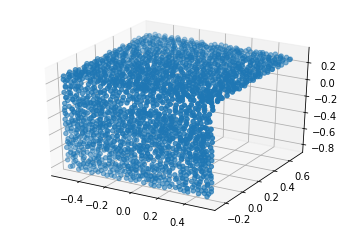

In [19]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = cloud.T
ax.scatter(x,y,z)
plt.show()

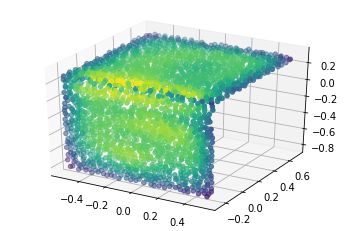

In [41]:
values = cloud.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

In [50]:
with h5py.File(mod40file, 'r') as f_to_r:
        cloud = f_to_r['data'][200] # get first cloud

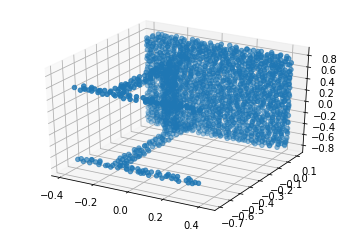

In [51]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = cloud.T
ax.scatter(x,y,z)
plt.show()

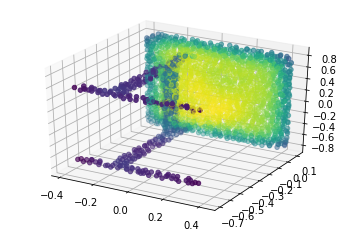

In [53]:
values = cloud.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

In [24]:
with h5py.File(mod40file, 'r') as f_to_r:
        cloud = f_to_r['data'][600] # get first cloud

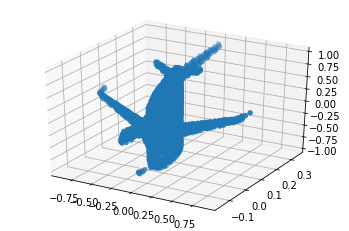

In [59]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = cloud.T
ax.scatter(x,y,z)
plt.show()

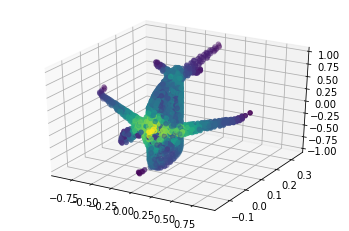

In [25]:
values = cloud.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

In [38]:
with h5py.File(mod40file, 'r') as f_to_r:
        cloud = f_to_r['data'][800] # get first cloud

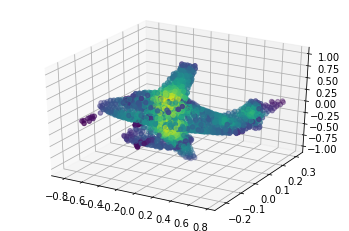

In [39]:
values = cloud.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

In [41]:
with h5py.File(mod40file, 'r') as f_to_r:
        cloud = f_to_r['data'][802] # get first cloud

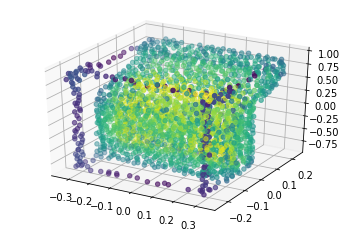

In [37]:
values = cloud.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

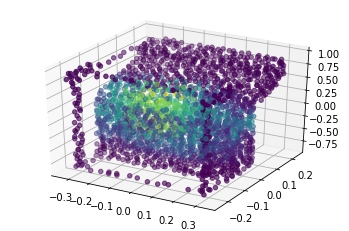

In [43]:
values = cloud.T

#kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

# look above
The  gaussian values from the airplane can be applied to the table. you can apply the gaussian kde from the input to the bps cloud to find out which points to assign a bigger weight to?

the two below are equivalent.

In [56]:
kde.evaluate(values)

array([5.76798993e+00, 5.80448613e-04, 3.51378691e-02, ...,
       5.60642116e+00, 4.96491462e-01, 4.05226842e-08])

In [54]:
kde(values)

array([5.76798993e+00, 5.80448613e-04, 3.51378691e-02, ...,
       5.60642116e+00, 4.96491462e-01, 4.05226842e-08])

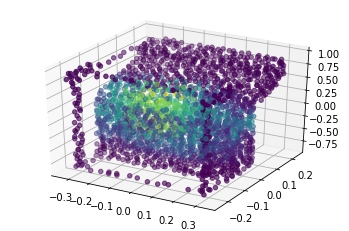

In [59]:
kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

In [138]:
with h5py.File(mod40file, 'r') as f_to_r:
        cloud = f_to_r['data'][800] # get first cloud

In [139]:
cloud = cloud[np.newaxis, :]
print(cloud.shape)

(1, 2048, 3)


In [140]:
values = bps.normalize(cloud) # normalize
values = values.reshape(-1, 3)
print(values.shape)

(2048, 3)


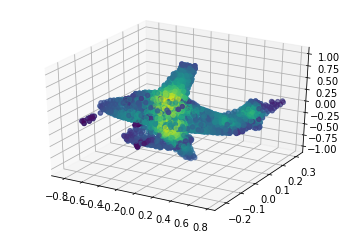

In [141]:
values = values.T

kde = stats.gaussian_kde(values)
density = kde(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

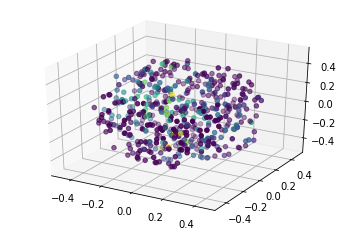

In [125]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
density = kde(basis_set.T)
x, y, z = basis_set.T
ax.scatter(x, y, z, c=density)
plt.show()

In [142]:
encoded_values = values[np.newaxis, :]
encoded_values = encoded_values.reshape(1, 2048, 3)
encoded_values.shape

(1, 2048, 3)

In [143]:
encoded_v = bps.encode(encoded_values, bps_cell_type='closest', radius=radius)

using 12 available CPUs for BPS encoding..


0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]






100%|██████████| 1/1 [00:00<00:00, 176.80it/s]



In [144]:
encoded_v = encoded_v.reshape(-1, 3)

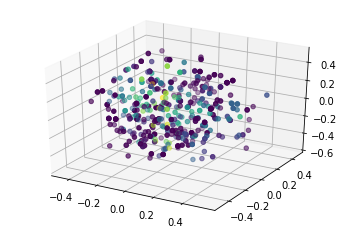

In [145]:
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
density = kde(encoded_v.T)
x, y, z = encoded_v.T
ax.scatter(x, y, z, c=density)
plt.show()

In [53]:
import ngtpy

start = timer()

for fid in fid_lst:
    objects = []
    # Populate the list with input cloud
    for in_point in x[fid]:
        objects.append(in_point)
    
    ngtpy.create(b"tmp", n_dims, distance_type='E')
    index = ngtpy.Index(b"tmp")
    index.batch_insert(objects)
    
    # removing index.save speeds things up.
    #index.save()
        
    # Find nn for each point in basis point cloud
    for b_idx, b_point in enumerate(basis_set):
        result = index.search(query=[b_point[0], b_point[1], b_point[2]], size=1, with_distance=True)
        idx_bps[fid][b_idx] = result[0][0]
        x_bps[fid][b_idx] = result[0][1]

    
end = timer()
print(end-start)

3.4736870580818504


You can see that it's faster when you don't save the index.

In [51]:
import ngtpy

start = timer()

for fid in fid_lst:
    objects = []
    # Populate the list with input cloud
    for in_point in x[fid]:
        objects.append(in_point)

    ngtpy.create(b"tmp", n_dims)
    
    index = ngtpy.Index(b"tmp")
    index.batch_insert(objects)
    
    # removing index.save speeds things up.
    #index.save()
        
    # Find nn for each point in basis point cloud
    for b_idx, b_point in enumerate(basis_set):
        result = index.search(query=[b_point[0], b_point[1], b_point[2]], size=1, with_distance=True)
        idx_bps[fid][b_idx] = result[0][0]
        x_bps[fid][b_idx] = result[0][1]

    
end = timer()
print(end-start)

3.475449724122882


# Don't remove create, it's needed by the index.
it only works if the folder already exists.

In [88]:
import ngtpy

start = timer()

for fid in fid_lst:
    objects = []
    # Populate the list with input cloud
    for in_point in x[fid]:
        objects.append(in_point)

    Removing create?
    ngtpy.create(b"tmp", n_dims)
    
    index = ngtpy.Index(b"tmp")
    index.batch_insert(objects)

    # removing index.save speeds things up.
    #index.save()
        
    # Find nn for each point in basis point cloud
    for b_idx, b_point in enumerate(basis_set):
        # epsilon to 0.01
        result = index.search(query=[b_point[0], b_point[1], b_point[2]], size=1, epsilon=0.01, with_distance=True)
        print
        idx_bps[fid][b_idx] = result[0][0]
        x_bps[fid][b_idx] = result[0][1]

    
end = timer()
print(end-start)

3.384827909991145


setting epsilon to =0.01 seems to gain 0.1 s, while not losing any accuracy in neighbours.

In [100]:
start = timer()

for fid in fid_lst:
    objects = []
    # Populate the list with input cloud
    for in_point in x[fid]:
        objects.append(in_point)
    
    ngtpy.create(b"tmp", n_dims)
    
    index = ngtpy.Index(b"tmp")
    index.batch_insert(objects)
    index.set(num_of_search_objects=1, search_radius=3)

    # removing index.save speeds things up.
    #index.save()
        
    # Find nn for each point in basis point cloud
    for b_idx, b_point in enumerate(basis_set):
        result = index.search(query=[b_point[0], b_point[1], b_point[2]], size=1, epsilon=0.01, with_distance=True)
        idx_bps[fid][b_idx] = result[0][0]
        x_bps[fid][b_idx] = result[0][1]

    
end = timer()
print(end-start)

3.3932263520546257


using set doesn't seem to affect speed.
PS i'm talking about the code above this text cell.

In [165]:
start = timer()

for fid in fid_lst:
    objects = []
    # Populate the list with input cloud
    for in_point in x[fid]:
        objects.append(in_point)
    
    # edge_size_for_creation greatly speeds up, search not as much
    ngtpy.create(b"tmp", n_dims, edge_size_for_creation=2, edge_size_for_search=n_bps_points)
    
    index = ngtpy.Index(b"tmp")
    index.batch_insert(objects)
    
    # Find nn for each point in basis point cloud
    for b_idx, b_point in enumerate(basis_set):
        result = index.search(query=[b_point[0], b_point[1], b_point[2]], size=1, epsilon=0.01, with_distance=True)
        idx_bps[fid][b_idx] = result[0][0]
        x_bps[fid][b_idx] = result[0][1]

    
end = timer()
print(end-start)

2.8678562201093882


# edge_size_for_creation, the lower it is the best speed, but lower accuracy.
edge_size_for_search doesn't have much impact.

In [166]:
!rm -rf tmp/

In [17]:
start = timer()

for fid in fid_lst:
    objects = []
    # Populate the list with input cloud
    for in_point in x[fid]:
        objects.append(in_point)
    
    # edge_size_for_creation greatly speeds up, search not as much
    ngtpy.create(b"tmp", n_dims, edge_size_for_creation=2, edge_size_for_search=n_bps_points)
    
    index = ngtpy.Index(b"tmp")
    index.batch_insert(objects)
    # no need to build index cause you're doing batch_insert
    
    # Find nn for each point in basis point cloud
    for b_idx, b_point in enumerate(basis_set):
        result = index.search(query=[b_point[0], b_point[1], b_point[2]], size=1, epsilon=0.01, with_distance=True)
        idx_bps[fid][b_idx] = result[0][0]
        x_bps[fid][b_idx] = result[0][1]

    
end = timer()
print(end-start)

2.885589514160529


In [46]:
start = timer()

for fid in fid_lst:
    
    # edge_size_for_creation greatly speeds up, search not as much
    ngtpy.create(b"tmp", n_dims, edge_size_for_creation=2, edge_size_for_search=n_bps_points)
    
    index = ngtpy.Index(b"tmp")
    index.batch_insert(x[fid])
    
    # Find nn for each point in basis point cloud
    for b_idx, b_point in enumerate(basis_set):
        result = index.search(query=[b_point[0], b_point[1], b_point[2]], size=1, epsilon=0.01, with_distance=True)
        idx_bps[fid][b_idx] = result[0][0]
        x_bps[fid][b_idx] = result[0][1]

    
end = timer()
print(end-start)

2.683734456077218


# using batch_insert speeds up even more! use it like above, x[fid]. because fid is an id, not a cloud. so you index the input with fid.

In [47]:
# there are high distances, but it's due to edge_size_for_creation
x_bps

array([[0.60961175, 1.0480746 , 1.164204  , ..., 0.07114316, 0.73357695,
        0.50611889],
       [0.28572312, 1.39232194, 0.94133115, ..., 0.22025135, 1.05862832,
        0.63998073],
       [0.35387206, 1.66672719, 1.48668611, ..., 0.22053802, 0.99216115,
        0.45862544],
       ...,
       [0.45049804, 1.35216272, 0.62350333, ..., 0.23006508, 0.98464221,
        0.854164  ],
       [0.28062221, 0.77431917, 0.85941988, ..., 0.06398611, 0.56396478,
        0.4961012 ],
       [0.18557243, 1.08537304, 1.21393836, ..., 0.24177101, 0.85907215,
        1.18087435]])

# dimension experiment
in the cell below, i will try making the index n_bps_points-dimensoinal (e.g. 512) and computing an entire basis point cloud against it.

In [48]:
start = timer()

#print(x[0].shape)
#
#ngtpy.create(b"tmp", n_orig_points, edge_size_for_creation=2, edge_size_for_search=n_bps_points)
#index = ngtpy.Index(b"tmp")
#index.insert(x[0])

for fid in fid_lst:
    
    # edge_size_for_creation greatly speeds up, search not as much
    ngtpy.create(b"tmp", n_bps_points, edge_size_for_creation=2, edge_size_for_search=n_bps_points)
    
    index = ngtpy.Index(b"tmp")
    index.insert(x[fid])
    index.build_index()
    #index.batch_insert(objects)
    # no need to build index cause you're doing batch_insert
    
    result = index.search(query=basis_set, size=1, epsilon=0.01, with_distance=True)
    
end = timer()
print(end-start)
print(result)

0.09123187907971442
[(0, 16.179702758789062)]


doesn't really work..

In [80]:
x_bps

array([[0.60961175, 1.0480746 , 1.164204  , ..., 0.07114316, 0.73357695,
        0.50611889],
       [0.55201781, 0.70541543, 1.11996424, ..., 0.09831072, 0.62443298,
        0.49821979],
       [0.52505952, 0.89018458, 1.15248621, ..., 0.15370691, 0.63809961,
        0.38013577],
       ...,
       [0.09815174, 1.13132966, 1.53206575, ..., 0.0105461 , 0.49830732,
        0.55856138],
       [0.09815174, 1.13132966, 1.53206575, ..., 0.0105461 , 0.46047688,
        0.55856138],
       [0.09815174, 1.13132966, 1.62510908, ..., 0.0105461 , 0.50163823,
        0.14785343]])

In [35]:
start = timer()

for fid in fid_lst:
    ngtpy.create("anng", n_dims)
    index = ngtpy.Index("anng")
    
    # Populate the list with input cloud
    for in_point in x[fid]:
        index.insert(in_point)
    
    # this coud be useful for inserting everything at once
    #index.batch_insert(objects)
    index.build_index()
    index.save()
        
    # Find nn for each point in basis point cloud
    for b_idx, b_point in enumerate(basis_set):
        result = index.search(query=[b_point[0], b_point[1], b_point[2]], size=1, with_distance=True)
        idx_bps[fid][b_idx] = result[0][0]
        x_bps[fid][b_idx] = result[0][1]

    
end = timer()
print(end-start)

3.993341371882707


From the previous two cells, you can see that index.insert(in_point) in the loop is slower than batch_insert in the cell before that one.

In [40]:
start = timer()

for fid in fid_lst:
    ngtpy.create(b"tmp", n_dims)
    index = ngtpy.Index(b"tmp")
    
    # Populate the list with input cloud
    for in_point in x[fid]:
        index.insert(in_point)
    
    # this coud be useful for inserting everything at once
    #index.batch_insert(objects)
    index.build_index()
    #index.save()
        
    # Find nn for each point in basis point cloud
    for b_idx, b_point in enumerate(basis_set):
        result = index.search(query=[b_point[0], b_point[1], b_point[2]], size=1, with_distance=True)
        idx_bps[fid][b_idx] = result[0][0]
        x_bps[fid][b_idx] = result[0][1]

    
end = timer()
print(end-start)

3.81735324091278


In [31]:
idx_bps

array([[ 109.,  641.,  919., ..., 2029., 1131., 2022.],
       [  64.,  435., 1086., ...,  774.,  228., 1390.],
       [ 342.,   47.,  915., ..., 2004.,   47., 1127.],
       ...,
       [ 320., 1298.,  423., ..., 1220., 1506.,  850.],
       [ 455., 1535., 1610., ..., 1101., 1535.,  694.],
       [2012.,  766., 1993., ...,  107., 1755., 1316.]])

In [17]:
start = timer()
for fid in fid_lst:
            nbrs = NearestNeighbors(n_neighbors=1, leaf_size=16, algorithm='kd_tree').fit(x[fid])
            fid_dist, npts_ix = nbrs.kneighbors(basis_set)
            x_bps[fid] = fid_dist.squeeze()
            idx_bps[fid] = npts_ix.squeeze()
end = timer()
print(end-start)

0.21903353603556752
